In [1]:
import librosa as lr
from main import constants, helpers
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

<span style="color:red">This notebook is obsolete and was just only used to create plots</span>

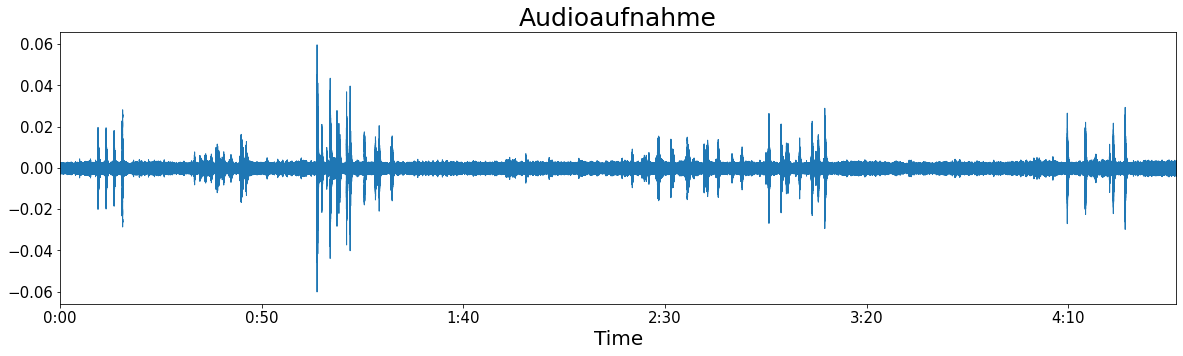

In [2]:
path = constants.DATA_RAW+"usage_0.wav"
audio, sr = lr.load(path,sr=44100)
plt.figure(figsize=(20,5))
plt.title("Audioaufnahme",size=25)
plt.xticks(size=15)
plt.xlabel("Zeit",size=20)
plt.yticks(size=15)
lr.display.waveplot(audio)
plt.savefig("audio.pdf",dpi = 300, bbox_inches="tight")

In [3]:
duration = helpers.get_duration(helpers.NOISE_RAW)
mean_duration = []
for i in range(9,12):
    mean_duration.append(duration[i])
print(mean_duration)
print(np.mean(np.array(mean_duration)))
#mean_duration = np.mean(np.array(helpers.getDuration(helpers.DATA_RAW))) / 60

[53.15496598639456, 31.950657596371883, 52.69965986394558]
45.93509448223734


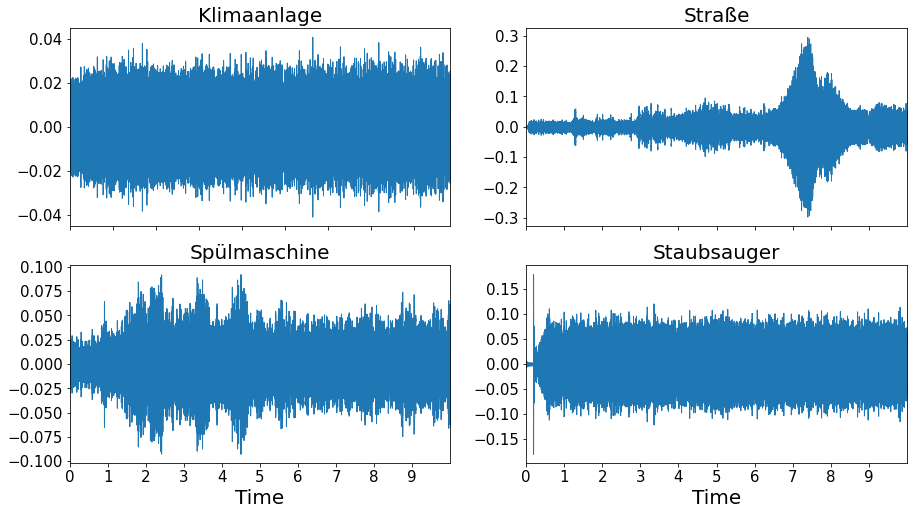

In [4]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(15,8))
aircon, sr = lr.load(constants.NOISE_RAW+"aircon_2.wav",sr = 44100,duration=10)
lr.display.waveplot(aircon,sr,ax=ax[0,0])
plt.sca(ax[0,0])
ax[0,0].label_outer()
plt.title("Klimaanlage",size=20)
plt.yticks(size=15)

dishwasher,sr = lr.load(constants.NOISE_RAW+"dishwasher_1.wav",sr=44100,duration=10)
lr.display.waveplot(dishwasher,sr,ax=ax[1,0])
plt.sca(ax[1,0])
plt.title("Spülmaschine",size=20)
plt.yticks(size=15)
plt.xlabel("Time",size=20)
plt.xticks(size=15)

street,sr = lr.load(constants.NOISE_RAW+"street_5.wav",sr=44100,duration=10)
lr.display.waveplot(street,sr,ax=ax[0,1])
plt.sca(ax[0,1])
ax[0,1].set_xticklabels([])
ax[0,1].set_xlabel(None)
plt.title("Straße",size=20)
#plt.xticks([])
plt.yticks(size=15)

vacuuming,sr = lr.load(constants.NOISE_RAW+"vacuuming_5.wav",sr=44100,duration=10)
lr.display.waveplot(vacuuming,sr,ax=ax[1,1])
plt.sca(ax[1,1])
plt.title("Staubsauger",size=20)
plt.yticks(size=15)
plt.xlabel("Time",size=20)
plt.xticks(size=15)
plt.savefig("noise.pdf",dpi = 300, bbox_inches="tight",transparent=True)

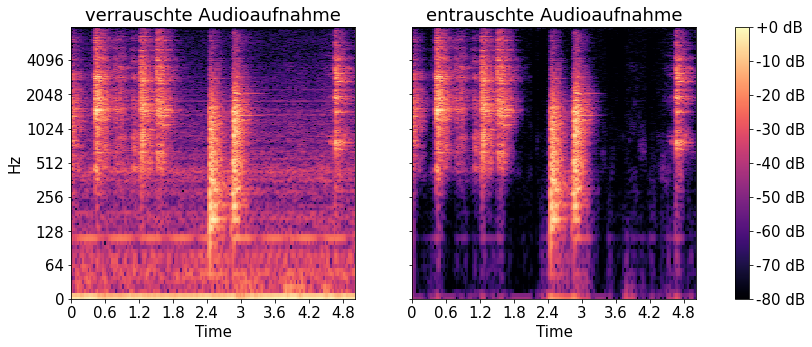

In [5]:
activity_0_5 = "/home/timo/Musik/usage_0_5.wav"
activity_noise, sr = lr.load(activity_0_5,sr=helpers.SAMPLE_RATE)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,5))

D_w = librosa.amplitude_to_db(np.abs(librosa.stft(activity_noise)), ref=np.max)
img = librosa.display.specshow(D_w,y_axis="log", x_axis="time",sr=helpers.SAMPLE_RATE,ax=ax[0])
plt.sca(ax[0])
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel("Time",size=15)
plt.ylabel("Hz",size=15)
plt.title("verrauschte Audioaufnahme",size=18)

activity_denoised, _ = lr.load(helpers.DATA_PROCESSED+"usage_0_5.wav",sr = helpers.SAMPLE_RATE)
D_a = librosa.amplitude_to_db(np.abs(librosa.stft(activity_denoised)), ref=np.max)
img_3 = librosa.display.specshow(D_a,y_axis="log", x_axis="time",sr=helpers.SAMPLE_RATE,ax=ax[1])
plt.sca(ax[1])
plt.xticks(size=15)
plt.yticks(size=15)
ax[1].set_yticklabels([])
ax[1].set_ylabel(None)
plt.xlabel("Time",size=15)
plt.title("entrauschte Audioaufnahme",size=18)

# fancy colorbar
cb = fig.colorbar(img,ax=ax,format="%+2.f dB")
for t in cb.ax.get_yticklabels():
    t.set_fontsize(15)
plt.savefig("noise_reduction.pdf",dpi=300,bbox_inches="tight",transparent=True)

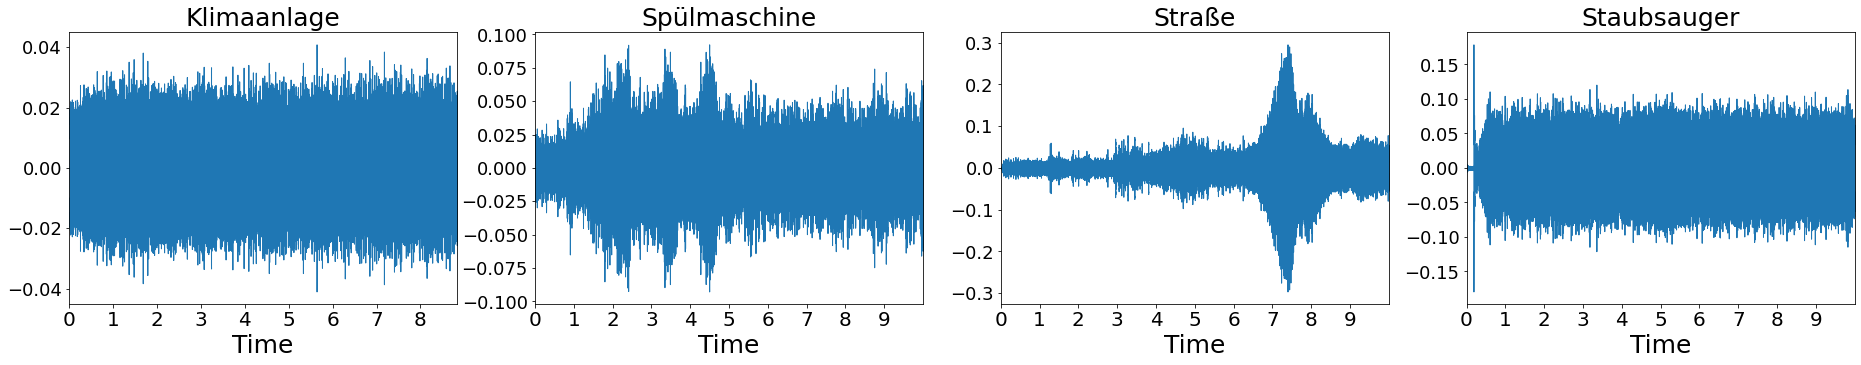

In [6]:
# The other 2x2 Spectogram plot is in test_constant.ipynb
fig,ax = plt.subplots(nrows=1,ncols=4,figsize=(32,5))
aircon, sr = lr.load(constants.NOISE_RAW+"aircon_2.wav",sr = 44100,duration=10)
lr.display.waveplot(aircon,sr,ax=ax[0])
plt.sca(ax[0])
ax[0].label_outer()
plt.xlabel("Time",size=25)
plt.title("Klimaanlage",size=25)
plt.xticks(size=20)
plt.yticks(size=18)

dishwasher,sr = lr.load(constants.NOISE_RAW+"dishwasher_1.wav",sr=44100,duration=10)
lr.display.waveplot(dishwasher,sr,ax=ax[1])
plt.sca(ax[1])
plt.title("Spülmaschine",size=25)
plt.yticks(size=18)
plt.xlabel("Time",size=25)
plt.xticks(size=20)

street,sr = lr.load(constants.NOISE_RAW+"street_5.wav",sr=44100,duration=10)
lr.display.waveplot(street,sr,ax=ax[2])
plt.sca(ax[2])
plt.xlabel("Time",size=25)
plt.title("Straße",size=25)
plt.yticks(size=18)
plt.xticks(size=20)

vacuuming,sr = lr.load(constants.NOISE_RAW+"vacuuming_5.wav",sr=44100,duration=10)
lr.display.waveplot(vacuuming,sr,ax=ax[3])
plt.sca(ax[3])
plt.title("Staubsauger",size=25)
plt.yticks(size=18)
plt.xlabel("Time",size=25)
plt.xticks(size=20)
plt.savefig("noise.pdf",dpi = 300, bbox_inches="tight",transparent=True)
